# Exploratory data analysis

I would like to see the typical length of the marvin keyword from the dataset to better inform the audio buffer length used in real-time classification.

In [42]:
from tensorflow.python.ops import gen_audio_ops as audio_ops
import tensorflow_io as tfio
from modules.data_preprocessing import get_files,get_voice_position
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [51]:
KEY_WORD='marvin'
DATA_FOLDER='audio_data'
NOISE_FLOOR=0.1
file_paths=get_files(KEY_WORD,DATA_FOLDER)

## Inspecting a random subset of samples

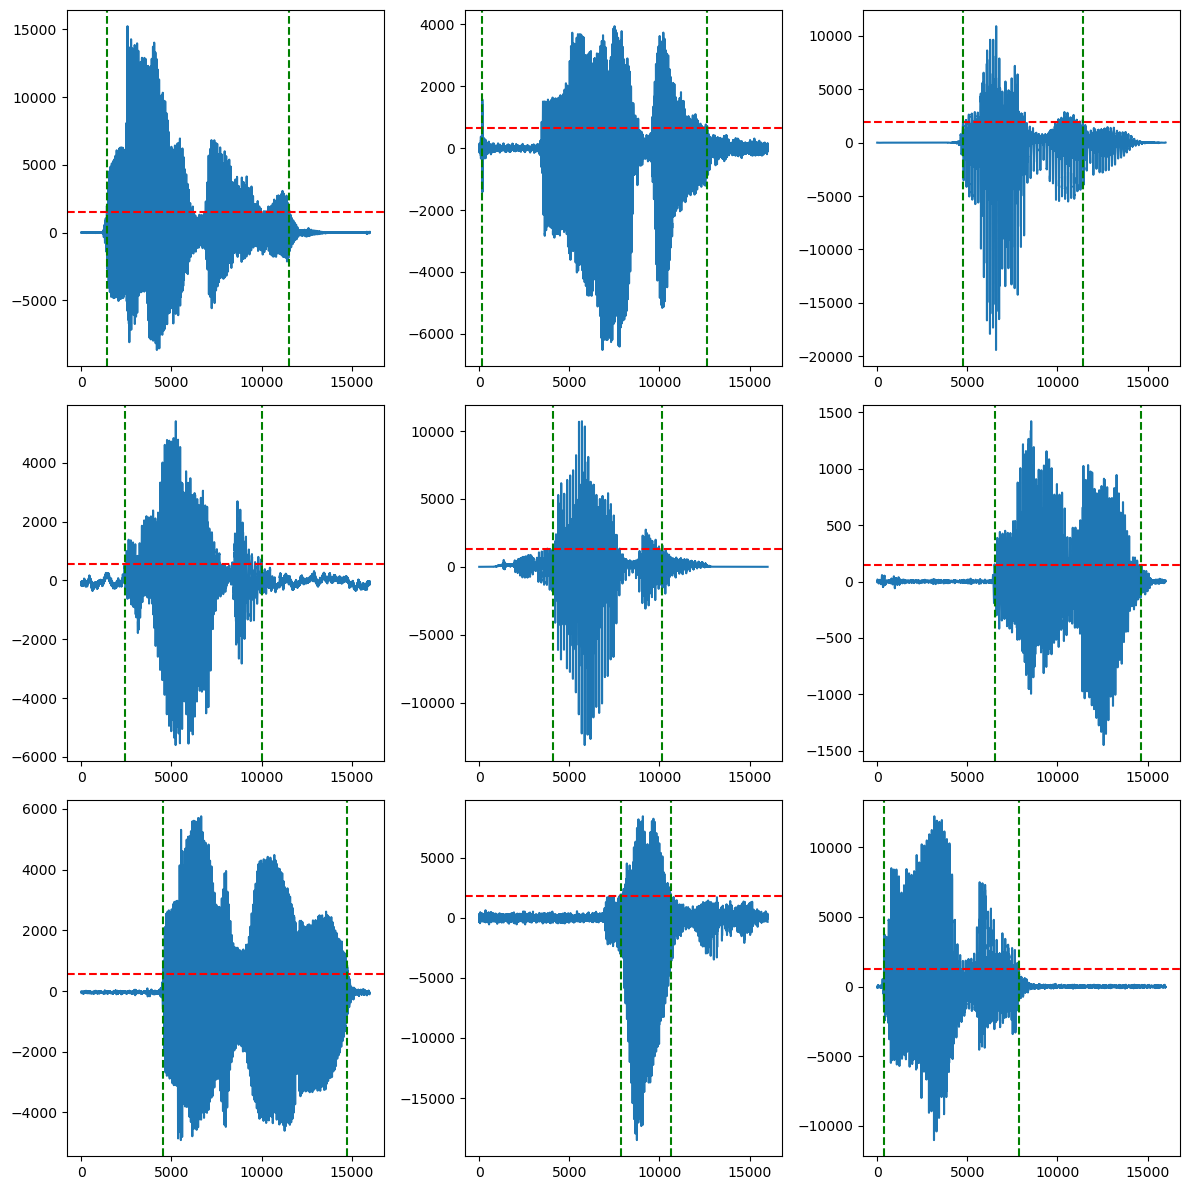

In [81]:
rand_files=np.random.choice(file_paths,9,replace=False)
fig,axes=plt.subplots(3,3,figsize=(12,12))
axes=axes.flatten()

for file,ax in zip(rand_files,axes):
    audio_tensor = tfio.audio.AudioIOTensor(file)
    audio_array=tf.cast(audio_tensor[:], tf.float32).numpy().flatten()

    ax.plot(audio_array)
    border=get_voice_position(audio_array,NOISE_FLOOR).numpy()
    ax.axhline(np.max(np.abs(audio_array))*NOISE_FLOOR,ls='--',color='red',)
    ax.axvline(border[0],ls="--",color='green')
    ax.axvline(border[1],ls="--",color='green')

plt.tight_layout()
plt.show()



## Distribution of the length marvin in dataset

There seems to be a normal distribution superimposed with samples of higher length some having nearly 16000 in length (1s) 

In [82]:
length_marvin=np.empty(len(file_paths))

for i,file in enumerate(file_paths):
    audio_tensor = tfio.audio.AudioIOTensor(file)
    audio_array=tf.cast(audio_tensor[:], tf.float32).numpy().flatten()
    border=get_voice_position(audio_array,NOISE_FLOOR).numpy()
    length_marvin[i]=border[1]-border[0]

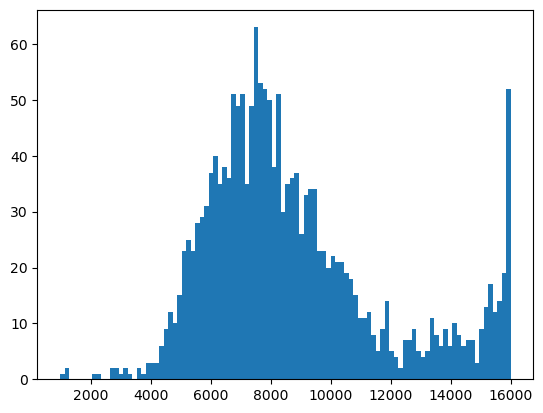

In [83]:
plt.hist(length_marvin,bins=100)
plt.show()

## Inspecting a random subset of samples with high length

Precisely samples above 15900 in length are inspected. As seen in the plots below it can be attributed to background noise. Some faulty samples have also been identified.  

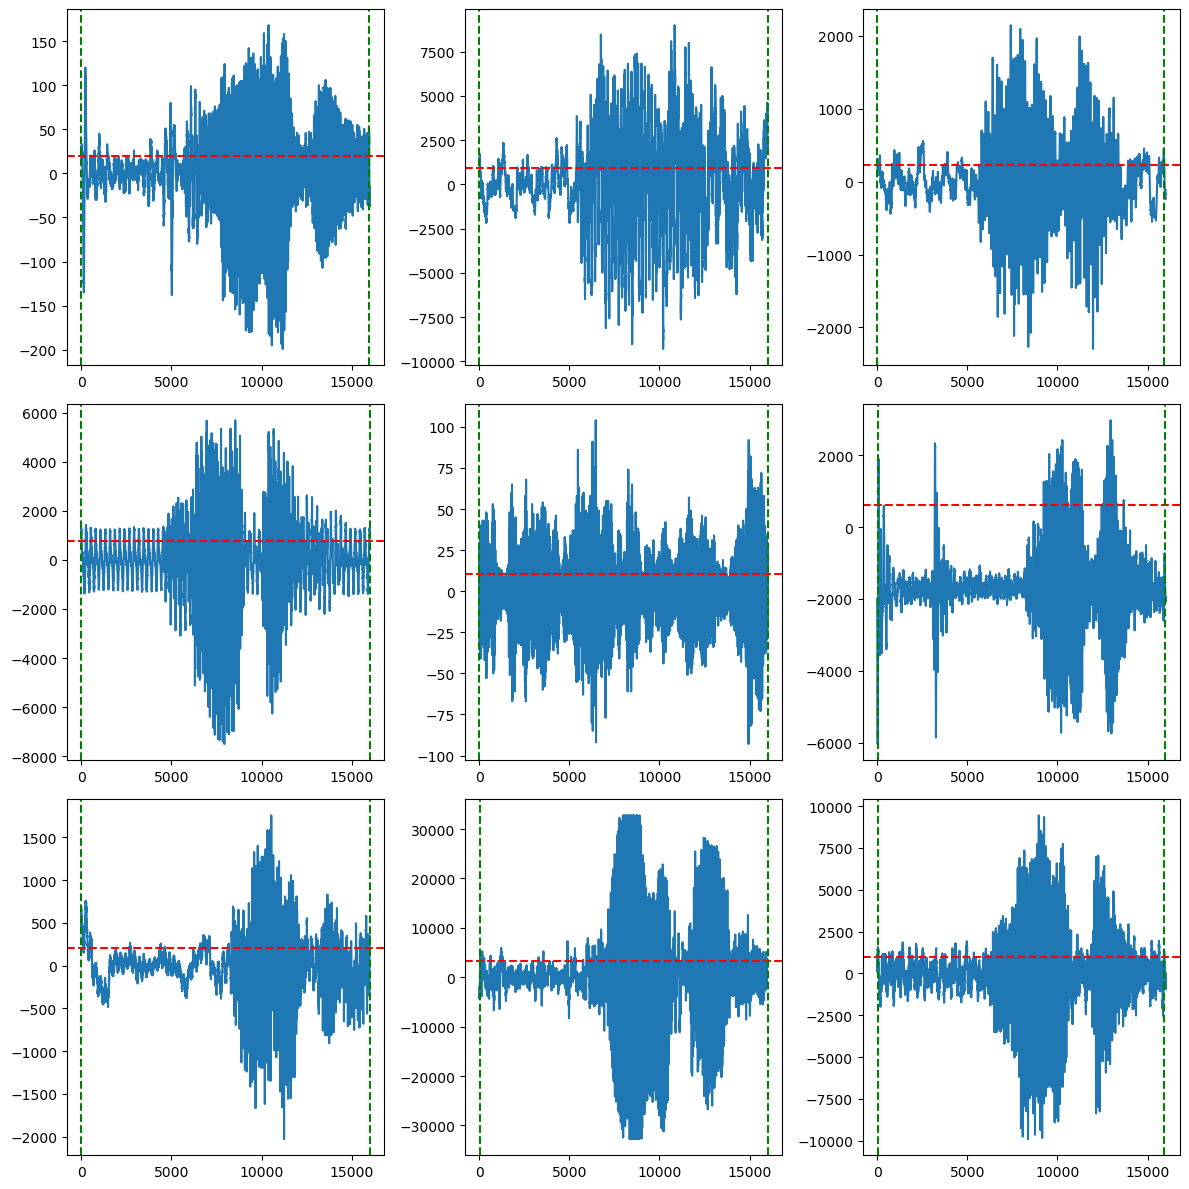

In [85]:
high_length=np.where(length_marvin>=15900)[0]
rand_index=np.random.choice(high_length,9,replace=False)
rand_files=np.array(file_paths)[rand_index]

fig,axes=plt.subplots(3,3,figsize=(12,12))
axes=axes.flatten()

for file,ax in zip(rand_files,axes):
    audio_tensor = tfio.audio.AudioIOTensor(file)
    audio_array=tf.cast(audio_tensor[:], tf.float32).numpy().flatten()

    ax.plot(audio_array)
    border=get_voice_position(audio_array,NOISE_FLOOR).numpy()
    ax.axhline(np.max(np.abs(audio_array))*NOISE_FLOOR,ls='--',color='red',)
    ax.axvline(border[0],ls="--",color='green')
    ax.axvline(border[1],ls="--",color='green')

plt.tight_layout()
plt.show()


In [104]:
bad_samples=['audio_data/marvin/3f2b358d_nohash_0.wav']

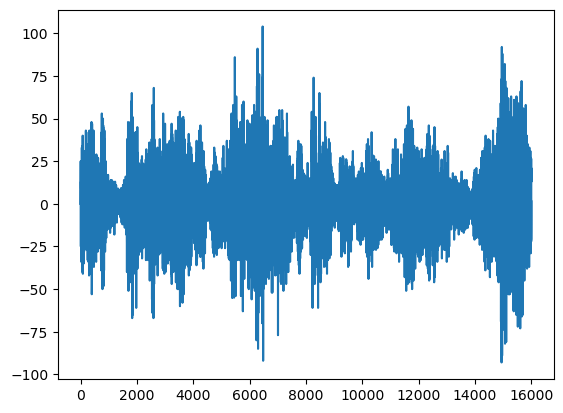

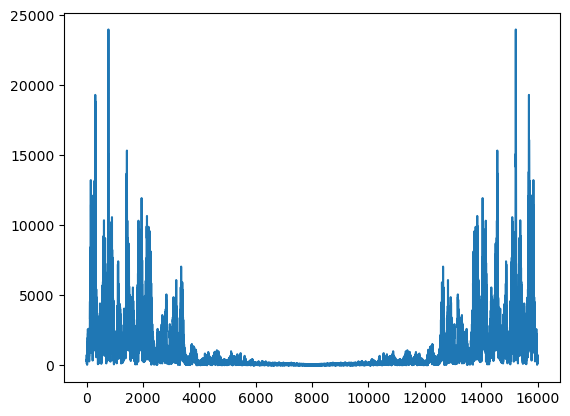

In [114]:
audio_tensor = tfio.audio.AudioIOTensor(bad_samples[0])
audio_array=tf.cast(audio_tensor[:], tf.float32).numpy().flatten()
plt.plot(audio_array)
plt.show()
fft=np.fft.fft(audio_array)
plt.plot(np.abs(fft))
plt.show()